In [1]:
#!conda create -n metrics python=3.11 ipykernel -y

In [2]:
#!activate metrics

In [3]:
#!python -m ipykernel install --user --name=metrics

In [4]:
#!conda info --envs

In [5]:
# import sys
# print(sys.executable)

#### scenario 1: when dataset is imbalanced

In [6]:
# creating random two arrays and considering them as actuals and predicted from any ML model
import random

actuals = [random.randrange(0,1) for i in range(0,1000)]+[0,0,0,0,1]   #making the data imbalanced
predicted=[random.randrange(0,1) for i in range(0,1000)]+[1,1,1,1,1]

In [7]:
from sklearn.metrics import classification_report
print(classification_report(actuals,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1004
           1       0.20      1.00      0.33         1

    accuracy                           1.00      1005
   macro avg       0.60      1.00      0.67      1005
weighted avg       1.00      1.00      1.00      1005



In [8]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(actuals,predicted))

[[1000    4]
 [   0    1]]


In [9]:
tn, fp, fn, tp = confusion_matrix(actuals,predicted).ravel()
tn, fp, fn, tp 

(1000, 4, 0, 1)

In [10]:
# calculating true positive rate - which is recall - basically saying that - out of total positive classes we are predicting - how many of them is actually positive 

tpr=tp/(tp+fn)
print(tpr)

1.0


In [11]:
fpr=fp/(fp+tn)
print(fpr)

0.00398406374501992


In [12]:
# auc-roc score when imbalance dataset is there 

from sklearn.metrics import roc_auc_score
roc_auc_score(actuals,predicted)

0.99800796812749

##### above roc-auc is very high because it considers two things- true positive rate and false positive rate, here true positive rate is very high and false positive is very low due less no of instances - eventhough the ROC is very high the model is not so great the below blog contains when to apply which metrics in binary classification scenario
https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc

##### in this kind of scenarios, we should be using ppv- positive predicive value(precision)

In [13]:
# out of all class predicted as positive how many of them actually positive
ppv=tp/(tp+fp)
print(ppv)

0.2


#### scenario 2: finding the probability threshold using pr curve - when we have minority class - its very important to have this in place

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4950
           1       1.00      0.54      0.70        50

    accuracy                           1.00      5000
   macro avg       1.00      0.77      0.85      5000
weighted avg       1.00      1.00      0.99      5000



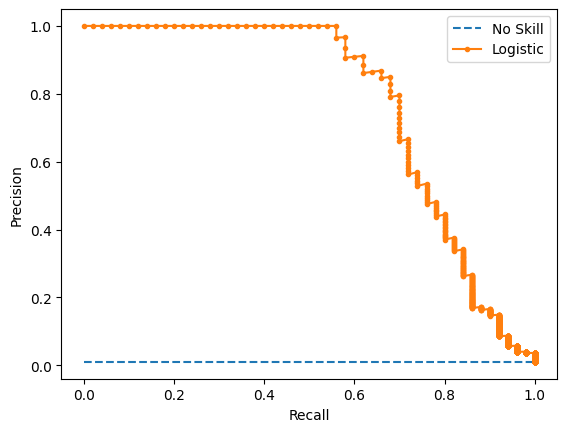

In [28]:
# pr curve for logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
print(classification_report(testy, model.predict(testX)))

# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(testy, yhat)
# plot the roc curve for the model
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

#### the above classification report is using the default threeshold of probability scores(0.5) but below we found what would be the ideal threshold for this particular scenario

In [26]:
from numpy import argmax
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.256036, F-Score=0.756


##### found out that if we change the threeshold to 0.25 from 0.5 we will be having better f1 score lets try that- 

In [29]:
yhat = model.predict_proba(testX)
probs = yhat[:, 1]

In [34]:
print(classification_report(testy, [1 if i>0.25 else 0 for i in list(probs)]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4950
           1       0.83      0.68      0.75        50

    accuracy                           1.00      5000
   macro avg       0.91      0.84      0.87      5000
weighted avg       1.00      1.00      1.00      5000



##### we found that changing threshold have impact on model f1 score